In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.shape

(200, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O"]
numerical_features

['Age', 'Na_to_K']

In [8]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
categorical_features

['Sex', 'BP', 'Cholesterol', 'Drug']

In [9]:
data["Sex"].unique()

array(['F', 'M'], dtype=object)

In [10]:
data["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [11]:
data["Cholesterol"].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [12]:
data["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [13]:
from sklearn import preprocessing

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
#data["Sex"] = label_encoder.fit_transform(data["Sex"])

In [16]:
Cat_fea = ["Sex", "BP", "Cholesterol"]

In [17]:
for feature in Cat_fea:
    data[feature] = label_encoder.fit_transform(data[feature])

In [18]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [19]:
x = data.drop(["Drug"], axis=1)
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [20]:
y = data["Drug"]

In [21]:
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [24]:
x_train.shape, x_test.shape

((134, 5), (66, 5))

In [25]:
y_train.shape, y_test.shape

((134,), (66,))

In [26]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
print("Model accuracy score with criterion gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini
print("Training set accuracy score: {0:0.4f}".format(accuracy_score(y_train, y_pred_train_gini )))

Model accuracy score with criterion gini index: 0.9091
Training set accuracy score: 0.9254


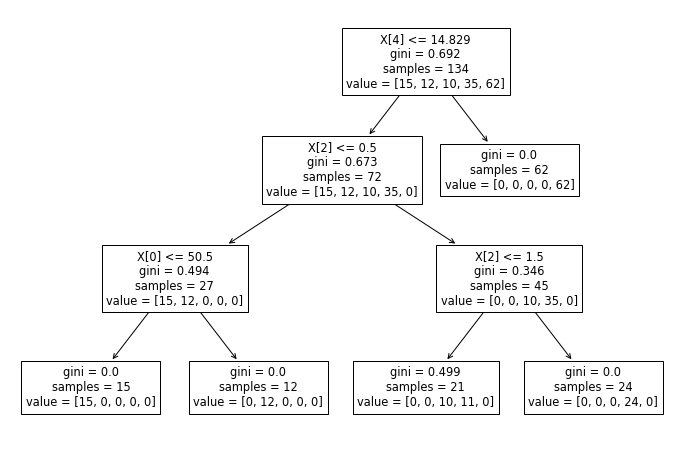

In [28]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train ,y_train))
plt.show()